In [1]:
import os
import json

from matplotlib import use

from autogen import config_list_from_json
from autogen import AssistantAgent, UserProxyAgent

llm_config = config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={"model": ["gpt-4"]},
)[0]
coder = AssistantAgent(name="coder", llm_config=llm_config)
user = UserProxyAgent(name="user", code_execution_config={
    "work_dir": "./coding"
},
is_termination_msg=lambda x: "TERMINATE" in x.get("content"),
human_input_mode="NEVER")

user.initiate_chat(coder, message="Find latest paper about GPT-4 on arxiv.")

user (to coder):

Find latest paper about GPT-4 on arxiv.

--------------------------------------------------------------------------------
coder (to user):

To get the latest paper about GPT-4 on arXiv, you can use the "arxiv" API. Here is the Python code to fetch the latest articles about GPT-4 from arXiv.

This program uses the 'arxiv' and 'feedparser' modules. 'arxiv' is the module used for the interaction with arxiv.org, and 'feedparser' is used for parsing the RSS feed returned by arxiv.org.

You'd need to install these modules if they are not installed yet. You can install them using 'pip':
```shell
pip install arxiv feedparser
```

And here's the python code:

```python
# filename: find_gpt4.py

import arxiv
import feedparser

# Search for papers on GPT-4
search = arxiv.Search(
  query = 'GPT-4',
  max_results = 100,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

# Find the newest one
papers = list(search.get())
latest_paper = papers[0]
print("Latest paper about GPT-4 on arXi

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change



>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is python)...


execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user (to coder):

exitcode: 1 (execution failed)
Code output: 
Defaulting to user installation because normal site-packages is not writeable

Traceback (most recent call last):
  File "find_gpt4.py", line 14, in <module>
    papers = list(search.get())
AttributeError: 'Search' object has no attribute 'get'


--------------------------------------------------------------------------------
coder (to user):

I apologize for the confusion. It appears the arxiv module might have changed since the last time I used it and the 'get' method no longer exists on a 'Search' object. I would proceed using the arxiv API directly with the use of the requests module below:

```python
# filename: find_gpt4.py

import requests
import feedparser

def search_arxiv(query_string: str) -> dict:
    response = requests.get('http://export.arxiv.org/api/query?search_query=all:' + query_string)
    feed = feedparser.parse(response.content)
    return feed.entries

papers = sorted(search_arxiv('GPT-4'), key=lambda

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user (to coder):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "find_gpt4.py", line 17, in <module>
    print(f'Authors: {", ".join(latest_paper.authors)}')
TypeError: sequence item 0: expected str instance, FeedParserDict found


--------------------------------------------------------------------------------
coder (to user):

I apologize for the confusion. I seem to have mistaken the 'authors' field in the 'latest_paper' object. We should extract the names from each author object. Here's the corrected code:

```python
# filename: find_gpt4.py

import requests
import feedparser

def search_arxiv(query_string: str) -> dict:
    response = requests.get('http://export.arxiv.org/api/query?search_query=all:' + query_string)
    feed = feedparser.parse(response.content)
    return feed.entries

papers = sorted(search_arxiv('GPT-4'), key=lambda x: x.published_parsed, reverse=True)

if papers:
    latest_paper = papers[0]
    authors_list = [author.na

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user (to coder):

exitcode: 0 (execution succeeded)
Code output: 
Latest paper about GPT-4 on arXiv:
Title: Large Language Models' Understanding of Math: Source Criticism and
  Extrapolation
Authors: Roozbeh Yousefzadeh, Xuenan Cao
Published on: 2023-11-12T07:52:32Z
Abstract: It has been suggested that large language models such as GPT-4 have acquired
some form of understanding beyond the correlations among the words in text
including some understanding of mathematics as well. Here, we perform a
critical inquiry into this claim by evaluating the mathematical understanding
of the GPT-4 model. Considering that GPT-4's training set is a secret, it is
not straightforward to evaluate whether the model's correct answers are based
on a mathematical understanding or based on replication of proofs that the
model has seen before. We specifically craft mathematical questions which their
formal proofs are not readily available on the web, proofs that are more likely
not seen by the GPT-4. We see t

[
  {
    "content": "Find latest paper about GPT-4 on arxiv.",
    "role": "user",
    "codes": [
      "USER_REQUEST"
    ]
  },
  {
    "content": "To get the latest paper about GPT-4 on arXiv, you can use the \"arxiv\" API. Here is the Python code to fetch the latest articles about GPT-4 from arXiv.\n\nThis program uses the 'arxiv' and 'feedparser' modules. 'arxiv' is the module used for the interaction with arxiv.org, and 'feedparser' is used for parsing the RSS feed returned by arxiv.org.\n\nYou'd need to install these modules if they are not installed yet. You can install them using 'pip':\n```shell\npip install arxiv feedparser\n```\n\nAnd here's the python code:\n\n```python\n# filename: find_gpt4.py\n\nimport arxiv\nimport feedparser\n\n# Search for papers on GPT-4\nsearch = arxiv.Search(\n  query = 'GPT-4',\n  max_results = 100,\n  sort_by = arxiv.SortCriterion.SubmittedDate\n)\n\n# Find the newest one\npapers = list(search.get())\nlatest_paper = papers[0]\nprint(\"Latest pa

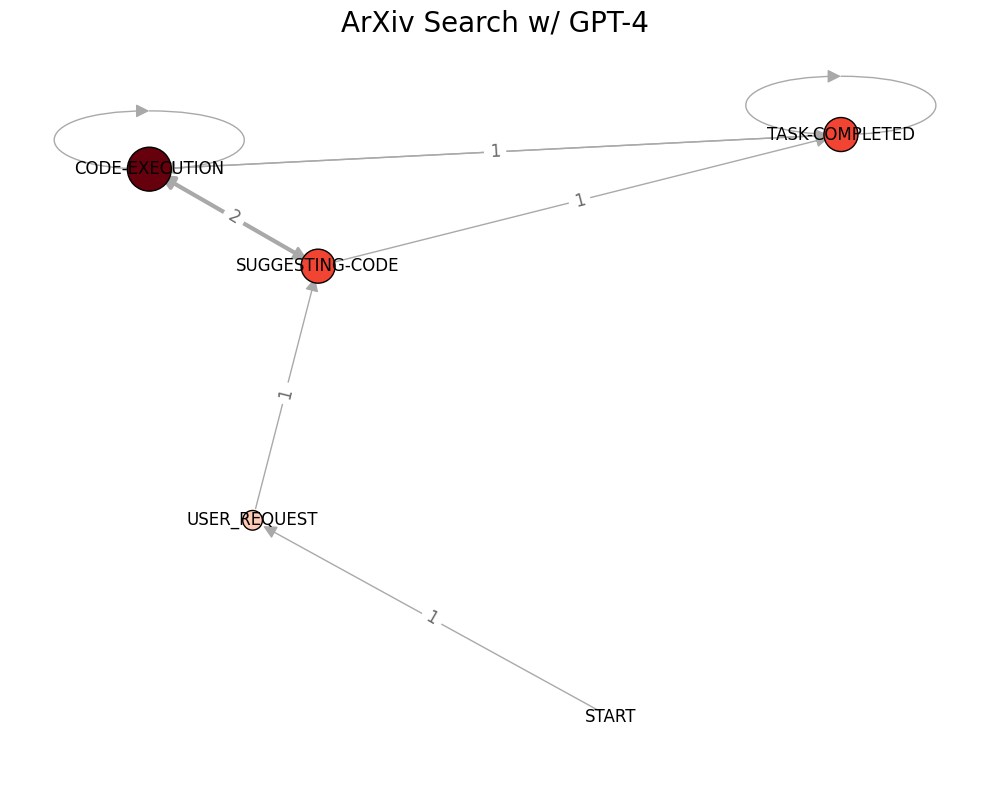

In [2]:
from autogen.agentchat.contrib.profiler import annotate_chat_history, draw_profiler_graph

# Load chat history
chat_history = coder.chat_messages[user]

# Annotate chat history
annotated_chat_history = annotate_chat_history(chat_history, llm_config=llm_config)

print(json.dumps(annotated_chat_history, indent=2))

# Visualize annotated chat history
draw_profiler_graph(
    annotated_chat_history,
    title="ArXiv Search w/ GPT-4",
    output_dir="/tmp",
    filename="profiler_graph.png",
)